# COVID 19 GENE 


In [1]:
# Importing Libraries

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
import joblib
import os
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [128]:
# Importing Dataset

In [129]:
dataset=pd.read_csv("Dataset.csv")
dataset

,CZB_ID,sequencing_batch,gender,age,SC2_PCR,SC2_rpm,idseq_sample_name,viral_status
0,RR057e_00202,SEQ005,F,62.0,NEG,0.301622,RR057e_00202_N05_S78,no_virus
1,RR057e_00080,SEQ003,M,81.0,NEG,0.091199,RR057e_00080_H20_S312,no_virus
2,RR057e_00287,SEQ005,F,76.0,NEG,0.763690,RR057e_00287_L09_S140,no_virus
3,RR057e_00753,SEQ005,F,36.0,POS,350.242314,RR057e_00753_G10_S151,SC2
4,RR057e_00751,SEQ005,F,58.0,POS,96314.765870,RR057e_00751_C10_S147,SC2
...,...,...,...,...,...,...,...,...
229,RR057e_00721,SEQ003,M,27.0,POS,538091.550200,RR057e_00721_L04_S60,SC2
230,RR057e_00731,SEQ003,F,63.0,POS,90961.166370,RR057e_00731_H08_S120,SC2
231,RR057e_00728,SEQ003,F,40.0,POS,496.588695,RR057e_00728_N06_S94,SC2
232,RR057i_00067,SEQ003,F,44.0,POS,1625.174178,RR057i_00067_C05_S67,SC2


In [130]:
#drop unnecessary columns

In [131]:
dataset=dataset.drop('idseq_sample_name',axis=1)

In [132]:
dataset=dataset.drop('CZB_ID',axis=1)

In [133]:
dataset['viral_status'].unique()

array(['no_virus', 'SC2', 'other_virus'], dtype=object)

In [134]:
dataset.dropna(inplace=True)

In [135]:
dataset.isnull().sum()

sequencing_batch    0
gender              0
age                 0
SC2_PCR             0
SC2_rpm             0
viral_status        0
dtype: int64

In [136]:
dataset.head()

,sequencing_batch,gender,age,SC2_PCR,SC2_rpm,viral_status
0,SEQ005,F,62.0,NEG,0.301622,no_virus
1,SEQ003,M,81.0,NEG,0.091199,no_virus
2,SEQ005,F,76.0,NEG,0.763690,no_virus
3,SEQ005,F,36.0,POS,350.242314,SC2
4,SEQ005,F,58.0,POS,96314.765870,SC2


In [137]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 233
Data columns (total 6 columns):
sequencing_batch    234 non-null object
gender              234 non-null object
age                 234 non-null float64
SC2_PCR             234 non-null object
SC2_rpm             234 non-null float64
viral_status        234 non-null object
dtypes: float64(2), object(4)
memory usage: 12.8+ KB


In [138]:
dataset.isnull().sum()

sequencing_batch    0
gender              0
age                 0
SC2_PCR             0
SC2_rpm             0
viral_status        0
dtype: int64

In [139]:
dataset.describe()

,age,SC2_rpm
count,234.000000,234.000000
mean,52.085930,25771.291648
std,16.932609,109466.332772
min,20.000000,0.000000
25%,40.000000,0.137426
50%,50.500000,0.463689
75%,65.000000,184.847240
max,89.000000,770097.174900


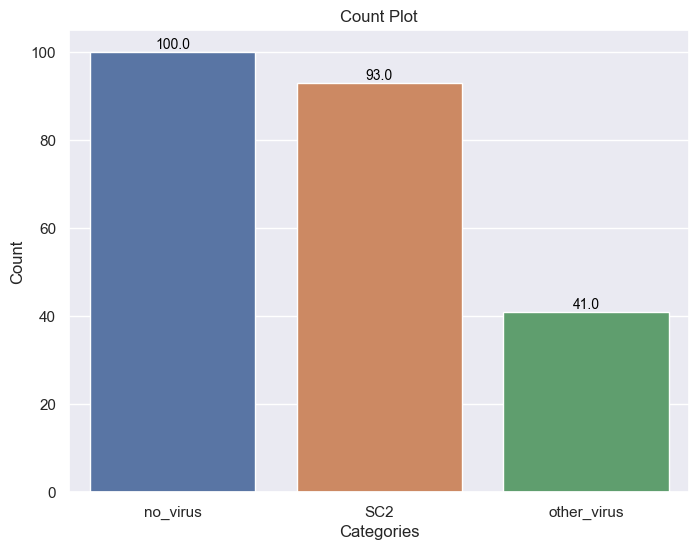

In [140]:
# Create a count plot
sns.set(style="darkgrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size
ax = sns.countplot(x='viral_status', data=dataset)
plt.title("Count Plot")  # Add a title to the plot
plt.xlabel("Categories")  # Add label to x-axis
plt.ylabel("Count")  # Add label to y-axis
# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()  # Display the plot

In [141]:
# Converting object type to int type

In [142]:
le= LabelEncoder()
dataset['viral_status']=  le.fit_transform(dataset['viral_status'])

In [143]:
dataset['sequencing_batch']=le.fit_transform(dataset['sequencing_batch'])

In [144]:
dataset['gender']=le.fit_transform(dataset['gender'])

In [145]:
dataset['SC2_PCR']=le.fit_transform(dataset['SC2_PCR'])

In [146]:
dataset.dropna(inplace=True)

In [147]:
#Defining Dependent and independent variables

In [148]:
X=dataset.iloc[:,0:5]

In [149]:
X

,sequencing_batch,gender,age,SC2_PCR,SC2_rpm
0,1,0,62.0,0,0.301622
1,0,1,81.0,0,0.091199
2,1,0,76.0,0,0.763690
3,1,0,36.0,1,350.242314
4,1,0,58.0,1,96314.765870
...,...,...,...,...,...
229,0,1,27.0,1,538091.550200
230,0,0,63.0,1,90961.166370
231,0,0,40.0,1,496.588695
232,0,0,44.0,1,1625.174178


In [183]:
y=dataset.iloc[:,-1]

In [184]:
y

0      1
1      1
2      1
3      0
4      0
      ..
229    0
230    0
231    0
232    0
233    1
Name: viral_status, Length: 234, dtype: int32

In [185]:
#Datasplitting

In [186]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=77)

In [187]:
X_train.shape

(163, 5)

In [169]:
X_test.shape

(71, 5)

In [170]:
from sklearn.preprocessing import StandardScaler

In [171]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [172]:
#Building a ML Model

In [173]:
labels=['no_virus', 'SC2', 'other_virus']

In [174]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [175]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, testY,predict):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# AdaboostClassifier

Model loaded successfully.
AdaBoostClassifier Accuracy    : 78.87323943661971
AdaBoostClassifier Precision   : 66.66666666666666
AdaBoostClassifier Recall      : 55.55555555555555
AdaBoostClassifier FSCORE      : 60.0

 AdaBoostClassifier classification report
               precision    recall  f1-score   support

    no_virus       1.00      1.00      1.00        26
         SC2       0.67      1.00      0.80        30
 other_virus       0.00      0.00      0.00        15

    accuracy                           0.79        71
   macro avg       0.56      0.67      0.60        71
weighted avg       0.65      0.79      0.70        71



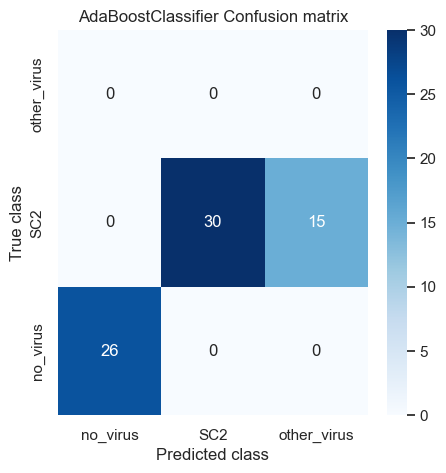

In [176]:
if os.path.exists('AdaboostClassifier.pkl'):
    # Load the trained model from the file
    clf = joblib.load('AdaBoostClassifier.pkl')
    print("Model loaded successfully.")
    predict = clf.predict(X_test)
    calculateMetrics("AdaBoostClassifier", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    clf = AdaBoostClassifier()
    clf.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(clf, 'AdaBoostClassifier.pkl')
    print("Model saved successfully.")
    predict = clf.predict(X_test)
    calculateMetrics("AdaBoostClassifier", predict, y_test)

# Support Vector Classifier

In [177]:
from sklearn.ensemble import RandomForestClassifier

Model loaded successfully.
SVC_model Accuracy    : 81.69014084507043
SVC_model Precision   : 71.11111111111111
SVC_model Recall      : 89.92248062015503
SVC_model FSCORE      : 68.57373086220791

 SVC_model classification report
               precision    recall  f1-score   support

    no_virus       1.00      1.00      1.00        26
         SC2       0.70      1.00      0.82        30
 other_virus       1.00      0.13      0.24        15

    accuracy                           0.82        71
   macro avg       0.90      0.71      0.69        71
weighted avg       0.87      0.82      0.76        71



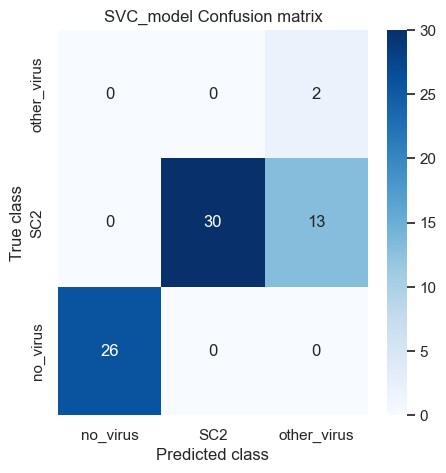

In [178]:
# Check if the model files exist
if os.path.exists('SVC_model.pkl'):
    # Load the trained model from the file
    clf = joblib.load('SVC_model.pkl')
    print("Model loaded successfully.")
    predict = clf.predict(X_test)
    calculateMetrics("SVC_model", predict, y_test)
else:
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(clf, 'SVC_model.pkl') 
    print("Model saved successfully.")
    predict = clf.predict(X_test)
    calculateMetrics("SVC_model", predict, y_test)

In [179]:
#showing all algorithms performance values
columns = ["Algorithm Name","Precison","Recall","FScore","Accuracy"]
values = []
algorithm_names = ["AdaboostClassifier",'Support Vector Classifier']
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],precision[i],recall[i],fscore[i],accuracy[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,Precison,Recall,FScore,Accuracy
0,AdaboostClassifier,66.666667,55.555556,60.000000,78.873239
1,Support Vector Classifier,71.111111,89.922481,68.573731,81.690141


In [180]:
# prediction

In [181]:
test=pd.read_csv("test.csv")
test['Condition']=le.fit_transform(test['Condition'])

FileNotFoundError: [Errno 2] File b'test.csv' does not exist: b'test.csv'

In [182]:
test

NameError: name 'test' is not defined

In [39]:
# Make predictions on the selected test data
predict = clf.predict(test)
# Loop through each prediction and print the corresponding row
for i, p in enumerate(predict):
    if p == 0:
        print(test.iloc[i])
        print("Row {}:************************************************** Fouling".format(i))
    elif p==1:
        print(test.iloc[i])
        print("Row {}:************************************************** Nominal".format(i))
    elif p==2:
        print(test.iloc[i])
        print("Row {}:************************************************** Open_circuit".format(i))
    elif p==3:
        print(test.iloc[i])
        print("Row {}:************************************************** Scaling".format(i))
    elif p==4:
        print(test.iloc[i])
        print("Row {}:************************************************** Short_circuit".format(i))

Supply          1.000000
Current       283.000000
Power         333.000000
Tsupply       363.574744
Wafer_Mdot      3.000000
Condition       0.000000
Name: 0, dtype: float64
Row 0:************************************************** Short_circuit
Supply          1.000000
Current       283.000000
Power         333.000000
Tsupply       362.349517
Wafer_Mdot      3.000000
Condition       1.000000
Name: 1, dtype: float64
Row 1:************************************************** Nominal
Supply          1.000000
Current       283.000000
Power         333.000000
Tsupply       361.216941
Wafer_Mdot      3.000000
Condition       2.000000
Name: 2, dtype: float64
Row 2:************************************************** Open_circuit
Supply          1.00000
Current       283.00000
Power         333.00000
Tsupply       360.16689
Wafer_Mdot      3.00000
Condition       3.00000
Name: 3, dtype: float64
Row 3:************************************************** Open_circuit
Supply          1.000000
Current  

In [40]:
test['predict']=predict

In [41]:
test

,Supply,Current,Power,Tsupply,Wafer_Mdot,Condition,predict
0,1,283,333.0,363.574744,3.0,0,4
1,1,283,333.0,362.349517,3.0,1,1
2,1,283,333.0,361.216941,3.0,2,2
3,1,283,333.0,360.166890,3.0,3,2
4,1,283,333.0,359.190662,3.0,4,2
5,1,283,333.0,358.280736,3.0,5,2
6,1,283,333.0,357.430579,3.0,6,2
7,1,283,333.0,356.634489,3.0,7,2
8,1,283,333.0,355.887468,3.0,8,2
9,1,283,333.0,359.238963,3.5,0,4
